<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/raw/master/img/logo_amds.png" alt="Logo" style="width: 128px;"/>

# AmsterdamUMCdb - Freely Accessible ICU Database

version 1.0.1 January 2020  
Copyright &copy; 2003-2020 Amsterdam UMC - Amsterdam Medical Data Science

# <a id='freetextitems'></a>freetextitems table
The *freetextitems* table contains all observations, including laboratory results, that store text (non-numeric) data. Personal data, including references to hospital staff have been removed. All items have an associated admissionid from the [admissions](admissions.ipynb#admissions) table.

## Fields

|Name|Type|Description|
|:---|:---|:---|
|admissionid|integer|links the items with the admissionid in the [admissions](admissions.ipynb#admissions) table|
|itemid|integer|id to identify the type of result|
|[item](#item)|string|type of result|
|[value](#value)|string|value of this text result|
|[comment](#comment)|string|comment associated with this result|
|measuredat|integer|time associated with this result in milliseconds since the first admission. Negative results imply that the sample was drawn before the first ICU admission|
|registeredat|integer|time the result was saved to the database in milliseconds since the first admission. Negative results imply that the sample was drawn before the first ICU admission.|
|registeredby|string|user group that updated the result ('System')|
|updatedat|integer|time the result was updated, in milliseconds since the first admission|
|updatedby|string|user group that updated the result ('System')|
|islabresult|bit|determines wheter the observation is a labresult. Currently, only freetext labresults have been released|

<h2>Example Python and SQL scripts</h2>

## Imports

In [1]:
%matplotlib inline
#gets the module from the repository for use in Colab
import os.path
try:
  if not os.path.isfile('amsterdamumcdb.py'):
    !wget https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
finally:
    import amsterdamumcdb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

--2020-01-30 20:05:33--  https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2899 (2.8K) [text/plain]
Saving to: ‘amsterdamumcdb.py’

amsterdamumcdb.py   100%[===================>]   2.83K  --.-KB/s    in 0s      

2020-01-30 20:05:33 (58.9 MB/s) - ‘amsterdamumcdb.py’ saved [2899/2899]



## Display settings

In [0]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 144
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 1000

## Connection settings

In [0]:
auth.authenticate_user()

project_id='milandaticu2020'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
os.environ["GOOGLE_CLOUD_PROJECT"]

config = {'query': 
          {'defaultDataset': {
              "datasetId": 'amsterdamumcdb_v_1_0_1', 
              "projectId": 'amsterdamumcdb-data' 
              }
           }
          }

## Overview of all fields

In [4]:
sql = """
SELECT * FROM freetextitems
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
freetexitems = pd.read_gbq(sql, configuration=config)
freetexitems.head(10)

``` mysql

SELECT * FROM freetextitems

```

,admissionid,itemid,item,value,comment,measuredat,registeredat,registeredby,updatedat,updatedby,islabresult
0,23069,17586,Nuchter?,volgt,None,-1899,-18000000,Systeem,85760804,None,1
1,22,17586,Nuchter?,onbekend,None,-190860000,-190860000,Systeem,244443,Systeem,1
2,36,17586,Nuchter?,onbekend,None,-29820000,-29820000,Systeem,22829090,Systeem,1
3,135,17586,Nuchter?,onbekend,None,290700000,290700000,Systeem,652461643,Systeem,1
4,144,17586,Nuchter?,onbekend,None,660960000,660960000,Systeem,861006000,Systeem,1
5,194,17586,Nuchter?,onbekend,None,-18840000,-18840000,Systeem,201989566,Systeem,1
6,204,17586,Nuchter?,onbekend,None,-1899,-47100000,Systeem,2301956,None,1
7,246,17586,Nuchter?,onbekend,None,-1173780000,-1173780000,Systeem,323563,Systeem,1
8,251,17586,Nuchter?,onbekend,None,-194100000,-194100000,Systeem,150190,Systeem,1
9,269,17586,Nuchter?,onbekend,None,-524100000,-524100000,Systeem,158903,Systeem,1


In [5]:
freetexitems.describe()

,admissionid,itemid,measuredat,registeredat,updatedat,islabresult
count,653040.000000,653040.000000,6.530400e+05,6.530400e+05,6.530400e+05,653040.0
mean,11767.901989,11861.028791,5.434522e+09,5.456993e+09,6.068839e+09,1.0
std,6768.990150,1179.085839,2.750823e+10,2.755847e+10,2.792045e+10,0.0
min,0.000000,10765.000000,-5.172246e+10,-5.172246e+10,-3.061021e+08,1.0
25%,6054.000000,11646.000000,9.000000e+06,9.720000e+06,5.914922e+07,1.0
50%,11713.500000,11646.000000,2.208600e+08,2.235600e+08,3.506514e+08,1.0
75%,17684.000000,11646.000000,1.187400e+09,1.192800e+09,1.401325e+09,1.0
max,23551.000000,21207.000000,3.916534e+11,3.916534e+11,3.916539e+11,1.0


## <a id='item'></a> item

In [6]:
sql = """
SELECT item, value, comment
FROM freetextitems
WHERE LOWER(item) LIKE '%coombs%'
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head()

``` mysql

SELECT item, value, comment
FROM freetextitems
WHERE LOWER(item) LIKE '%coombs%'

```

,item,value,comment
0,Dir.Coombs conclusie (bloed),volgt,None
1,Dir.Coombs conclusie (bloed),volgt,None
2,Dir.Coombs conclusie (bloed),volgt,6956
3,Dir.Coombs conclusie (bloed),Poly AHG = negatief,None
4,Dir.Coombs conclusie (bloed),Poly AHG = negatief,None


## <a id='value'></a> value

In [7]:
sql = """
SELECT DISTINCT value
FROM freetextitems
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT DISTINCT value
FROM freetextitems

```

,value
0,volgt
1,onbekend
2,Pat. is nuchter
3,Pat.is niet nuchter
4,Negatief
5,Positief
6,ntb
7,opm
8,vve
9,Dubieus


``` mysql

SELECT item, COUNT(item) AS Number_of_results
FROM freetextitems
WHERE NOT itemid = 11646 -- not a real result: location of bloodsample: arterial, venous, etc.
GROUP BY item
ORDER BY Number_of_results DESC
LIMIT 20

```

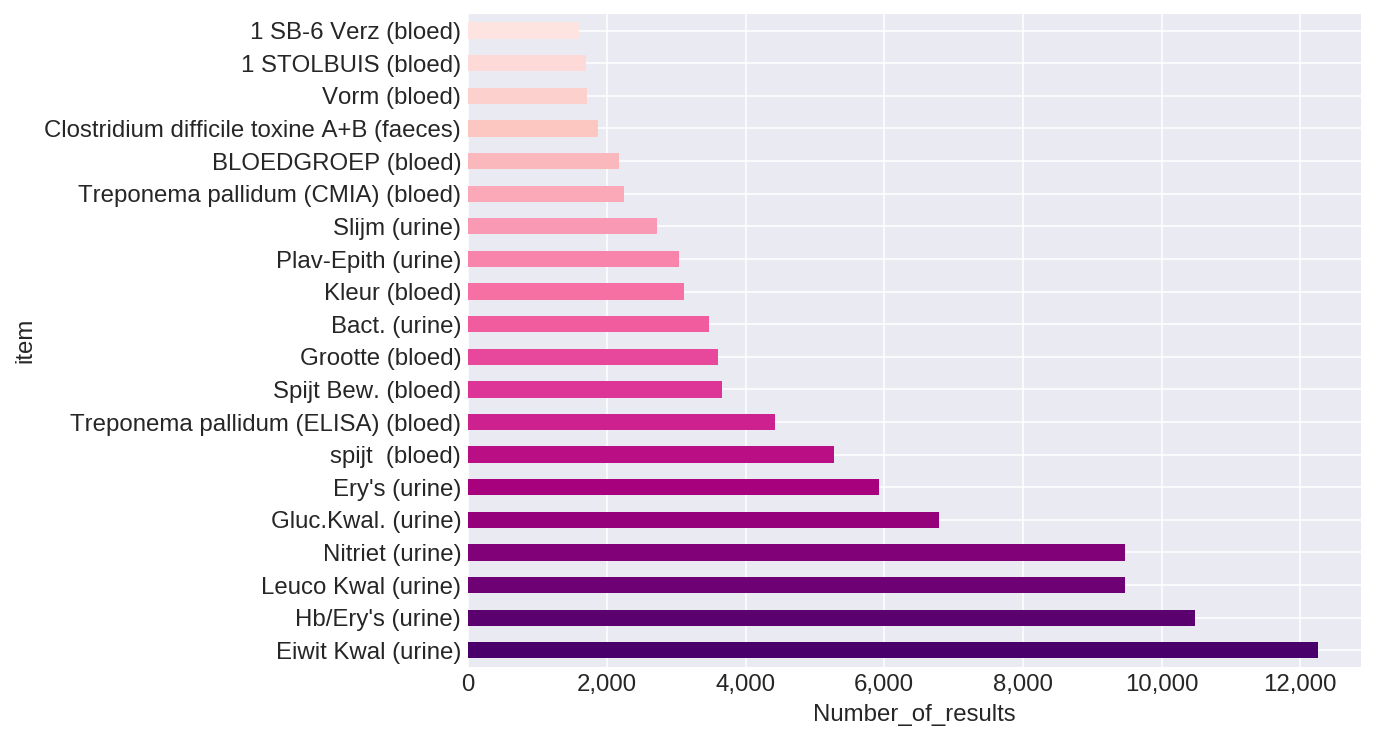

In [8]:
sql = """
SELECT item, COUNT(item) AS Number_of_results
FROM freetextitems
WHERE NOT itemid = 11646 -- not a real result: location of bloodsample: arterial, venous, etc.
GROUP BY item
ORDER BY Number_of_results DESC
LIMIT 20
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.barh(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(xlabel=df.columns[1])
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [9]:
sql = """
SELECT DISTINCT value, COUNT(item) AS Number_of_results
FROM freetextitems
WHERE itemid = 11646 -- location of bloodsample: arterial, venous, etc.
GROUP BY value
ORDER BY Number_of_results DESC
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT DISTINCT value, COUNT(item) AS Number_of_results
FROM freetextitems
WHERE itemid = 11646 -- location of bloodsample: arterial, venous, etc.
GROUP BY value
ORDER BY Number_of_results DESC

```

,value,Number_of_results
0,ART.,248873
1,Art.,242680
2,Ven.,7364
3,GEM.VEN.,5020
4,Gem. ven.,3556
5,VEN.,3387
6,volgt,2500
7,Vervalt,1465
8,ZIE-OPM,817
9,CAP.,164


``` mysql

SELECT DISTINCT value, COUNT(item) AS Number_of_results
FROM freetextitems
WHERE itemid = 11646 -- location of bloodsample: arterial, venous, etc.
GROUP BY value
ORDER BY Number_of_results DESC
LIMIT 5

```

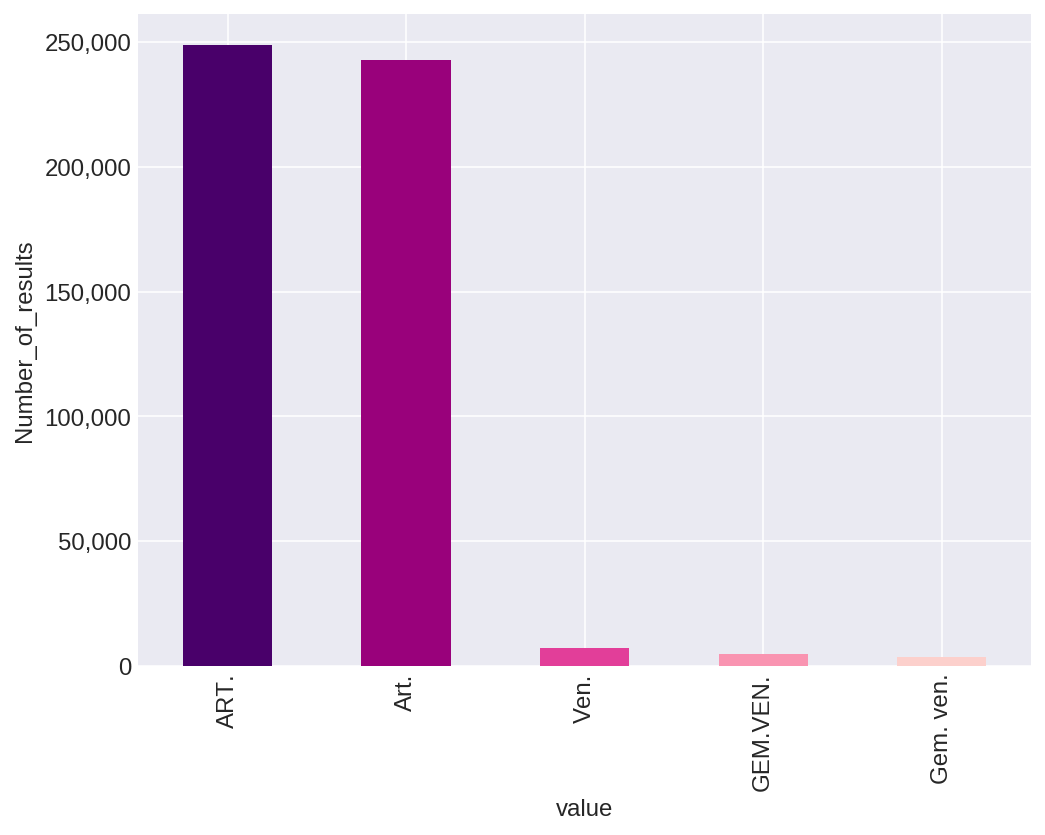

In [10]:
sql = """
SELECT DISTINCT value, COUNT(item) AS Number_of_results
FROM freetextitems
WHERE itemid = 11646 -- location of bloodsample: arterial, venous, etc.
GROUP BY value
ORDER BY Number_of_results DESC
LIMIT 5
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## <a id='comment'></a> comment

In [11]:
sql = """
SELECT DISTINCT comment
FROM freetextitems
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head()

``` mysql

SELECT DISTINCT comment
FROM freetextitems

```

,comment
0,None
1,Tijdens dialyse
2,Opmerking verwijderd
3,visit 1
4,Buizen achtergelaten voor afname door arts
